#**CAPSTONE ASSIGNMENT: HEART DATASET PREDICTION** 
**By Viha Sharma, Shivanshi Garodia, Karthik Krishnapura Venkateshan, Pawan Gera**

Our dataset contains data related to heart disease.

**OBJECTIVE**: To classify whether an individual has heart disease or not

In [ ]:
#import libraries to be used later
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import missingno as msno #To visualize missing value
import plotly.graph_objects as go #To Generate Graphs
import plotly.express as px 
import warnings #current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Heart.csv to Heart (4).csv


#1. VISUAL AND EXPLORATORY ANALYSIS

In [ ]:
#To store the dataset in a dataframe
df = pd.read_csv(io.BytesIO(uploaded['Heart.csv']))
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Basic introduction of data
print('1. Number of patients, Number of features:', df.shape)
print('')
print('2. Features:', df.columns)
print('')
print('3. Concise summary :')
df.info()

1. Number of patients, Number of features: (303, 14)

2. Features: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

3. Concise summary :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Data Cleaning

In [ ]:
#Data Cleaning
df.nunique() #To know the unique values in each feature

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
df.dtypes #To know the datatype of each feature

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df['caa'].unique() #As feature 'caa' only ranges from 0-3, find instances where caa=4

array([0, 2, 1, 3, 4])

In [ ]:
df[df['caa']==4] 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
df.loc[df['caa']==4, 'caa'] = np.NaN

In [ ]:
df['caa'].unique() # caa feature is now cleaned

array([ 0.,  2.,  1.,  3., nan])

In [ ]:
df.thall.value_counts() #As feature 'thal' only ranges from 1-3, find instances where thall=0

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

In [ ]:
df.loc[df['thall']==0, 'thall'] = np.NaN

In [ ]:
df[df['thall']==0] #No existing instances

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [ ]:
df['thall'].unique() #thall feature is now cleaned

array([ 1.,  2.,  3., nan])

In [ ]:
df.isnull().sum() #To check for missing values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         5
thall       2
output      0
dtype: int64

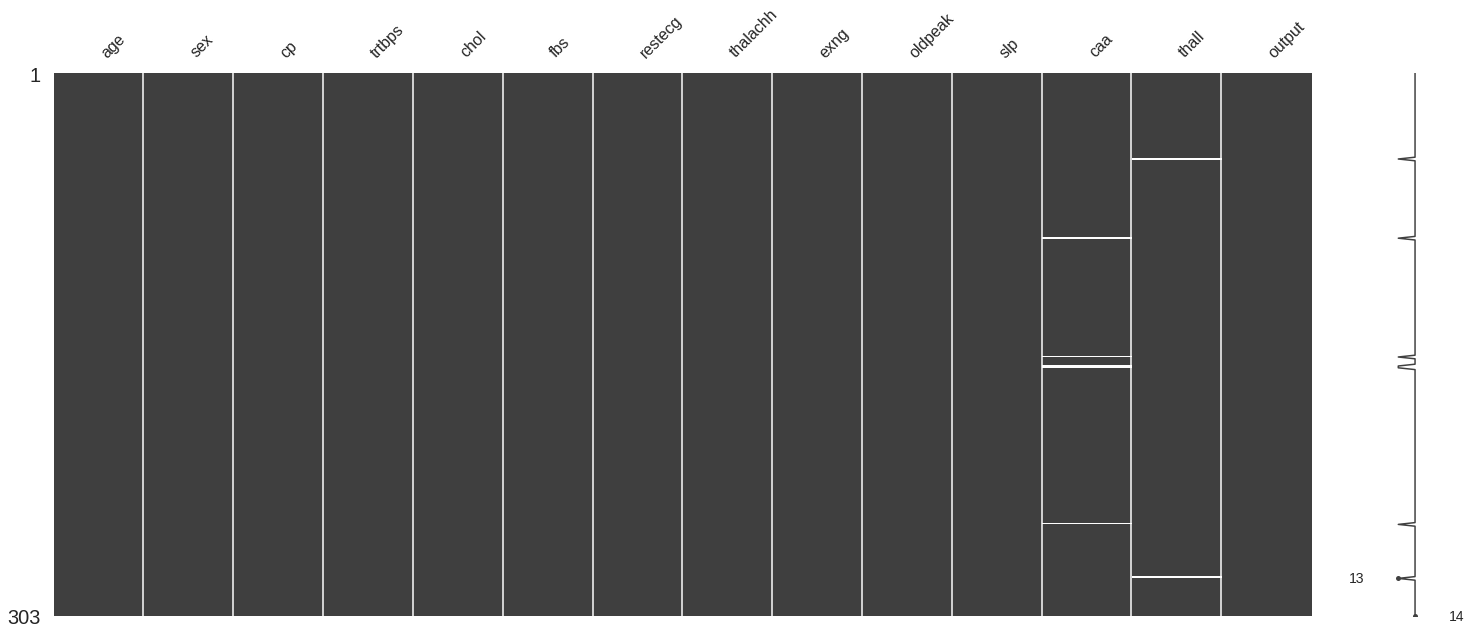

In [ ]:
msno.matrix(df) #To visualise the missing values using horizontal lines

In [ ]:
df = df.fillna(df.median()) #replacing NaN with median
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#Checking for duplicated rows
duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicated Rows in Dataset: {}'.format(duplicated))
else:
    print('Dataset contains no Duplicate values')

Duplicated Rows in Dataset: 1


In [ ]:
df = df.drop_duplicates()

In [ ]:
#Statistics Summary
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
df_numeric = df.copy()
df_numeric

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0


In [ ]:
#Improved labelling for clear visualisation and interpretation #ERROR OF HEATMAP DUE TO THIS CODE

df['output'] = df.output.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exng'] = df.exng.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slp'] = df.slp.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thall'] = df.thall.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

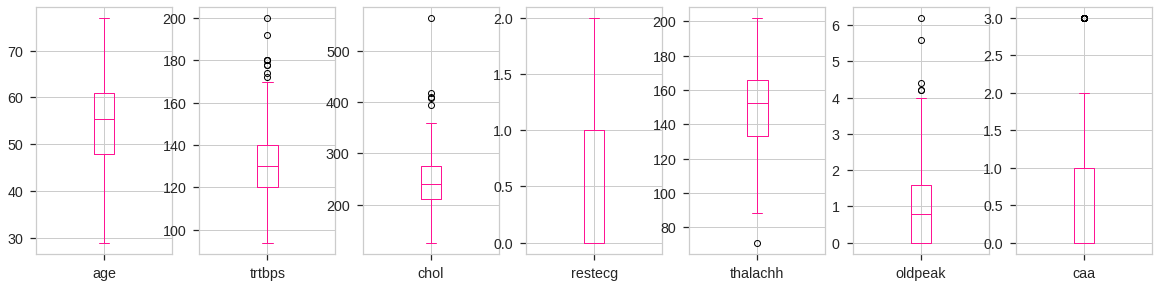

In [ ]:
#Visualisation to spot outliers

df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [ ]:
#To define continuous variable & plot
continous_features = ['age','trtbps','chol','thalachh','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #Mentioned above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trtbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalachh, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [ ]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trtbps feature removed
Outliers from chol feature removed
Outliers from thalachh feature removed
Outliers from oldpeak feature removed


Disease       158
No_disease    125
Name: output, dtype: int64


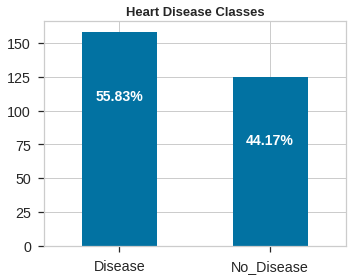

In [ ]:
#Visualisation feature distributions and inter-feature relationship

#1. Target value distribution

print(df.output.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.output.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

#interpretation: There are more diseased than healthy patients.

Text(0.5, 1.0, 'Age Distribution')

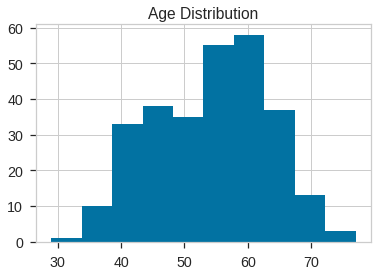

In [ ]:
# 2. Age distribution 
df["age"].hist().plot(kind="bar")
plt.title("Age Distribution")

58    18
57    17
54    15
52    12
59    12
51    11
44    11
60    11
41    10
56     9
Name: age, dtype: int64


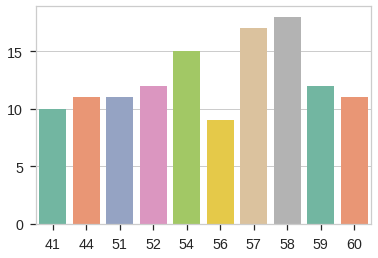

In [ ]:
# Analyze distribution in age in range 10 ##ERROR NEEDS TO BE FIXED##
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,
y=df.age.value_counts()[:10].values,
palette=("Set2"))

In [ ]:
# To know the youngest and oldest in age
print("Youngest patient:", min(df.age))
print("Oldest patient:", max(df.age))
print("Average age of patient:", df.age.mean())

Youngest patient: 29
Oldest patient: 77
Average age of patient: 54.04946996466431


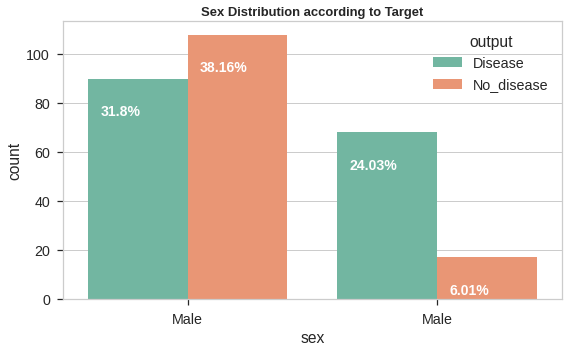

In [ ]:
# 2. Gender distribution vs Target variable

fig, ax = plt.subplots(figsize=(8,5))
name = df['sex']
ax = sns.countplot(x='sex', hue='output', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

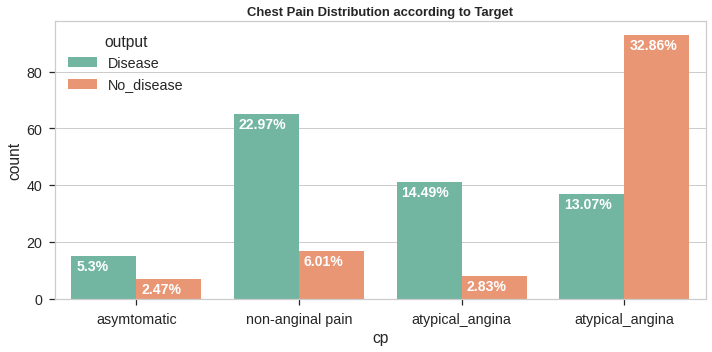

In [ ]:
# 3. Chest pain distribution vs target variable

fig, ax = plt.subplots(figsize=(10,5))
name = df['cp']
ax = sns.countplot(x='cp', hue='output', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

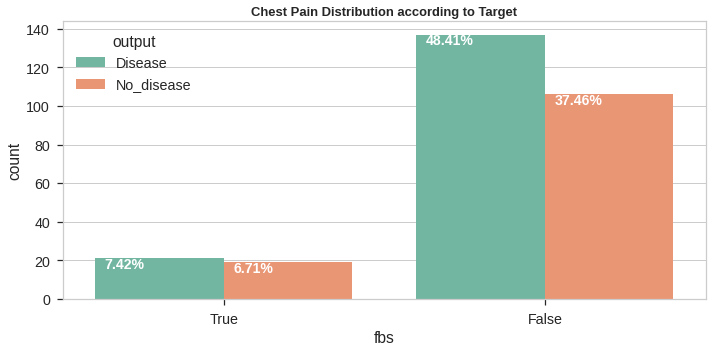

In [ ]:
#Fasting blood sugar vs target variable

fig, ax = plt.subplots(figsize=(10,5))
name = df['fbs']
ax = sns.countplot(x='fbs', hue='output', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

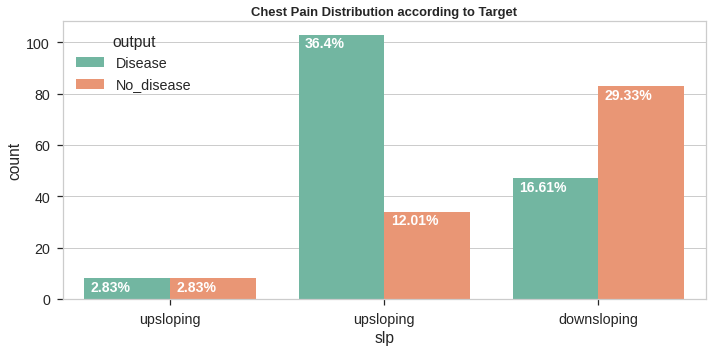

In [ ]:
#Slope distribution vs target variable

fig, ax = plt.subplots(figsize=(10,5))
name = df['slp']
ax = sns.countplot(x='slp', hue='output', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

[]

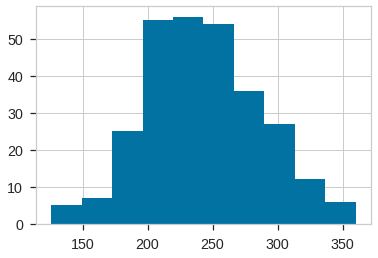

In [ ]:
# Distribution plots of continuous variables
df["chol"].hist().plot(kind="bar")

[]

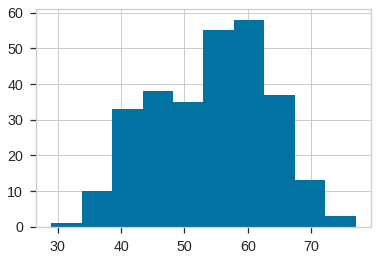

In [ ]:
df["age"].hist().plot(kind="bar")

[]

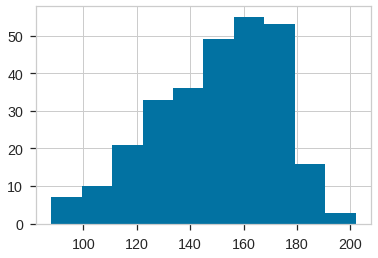

In [ ]:
df["thalachh"].hist().plot(kind="bar")

#interpretation: right-skewed

[]

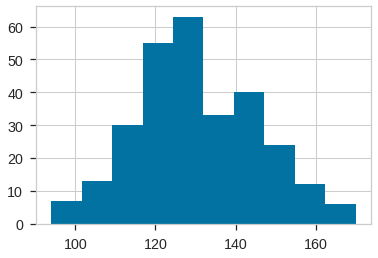

In [ ]:
df["trtbps"].hist().plot(kind="bar")

[]

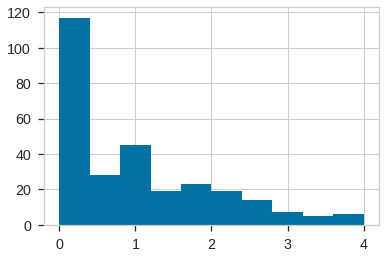

In [ ]:
df["oldpeak"].hist().plot(kind="bar") 

#interpretation: left-skewed

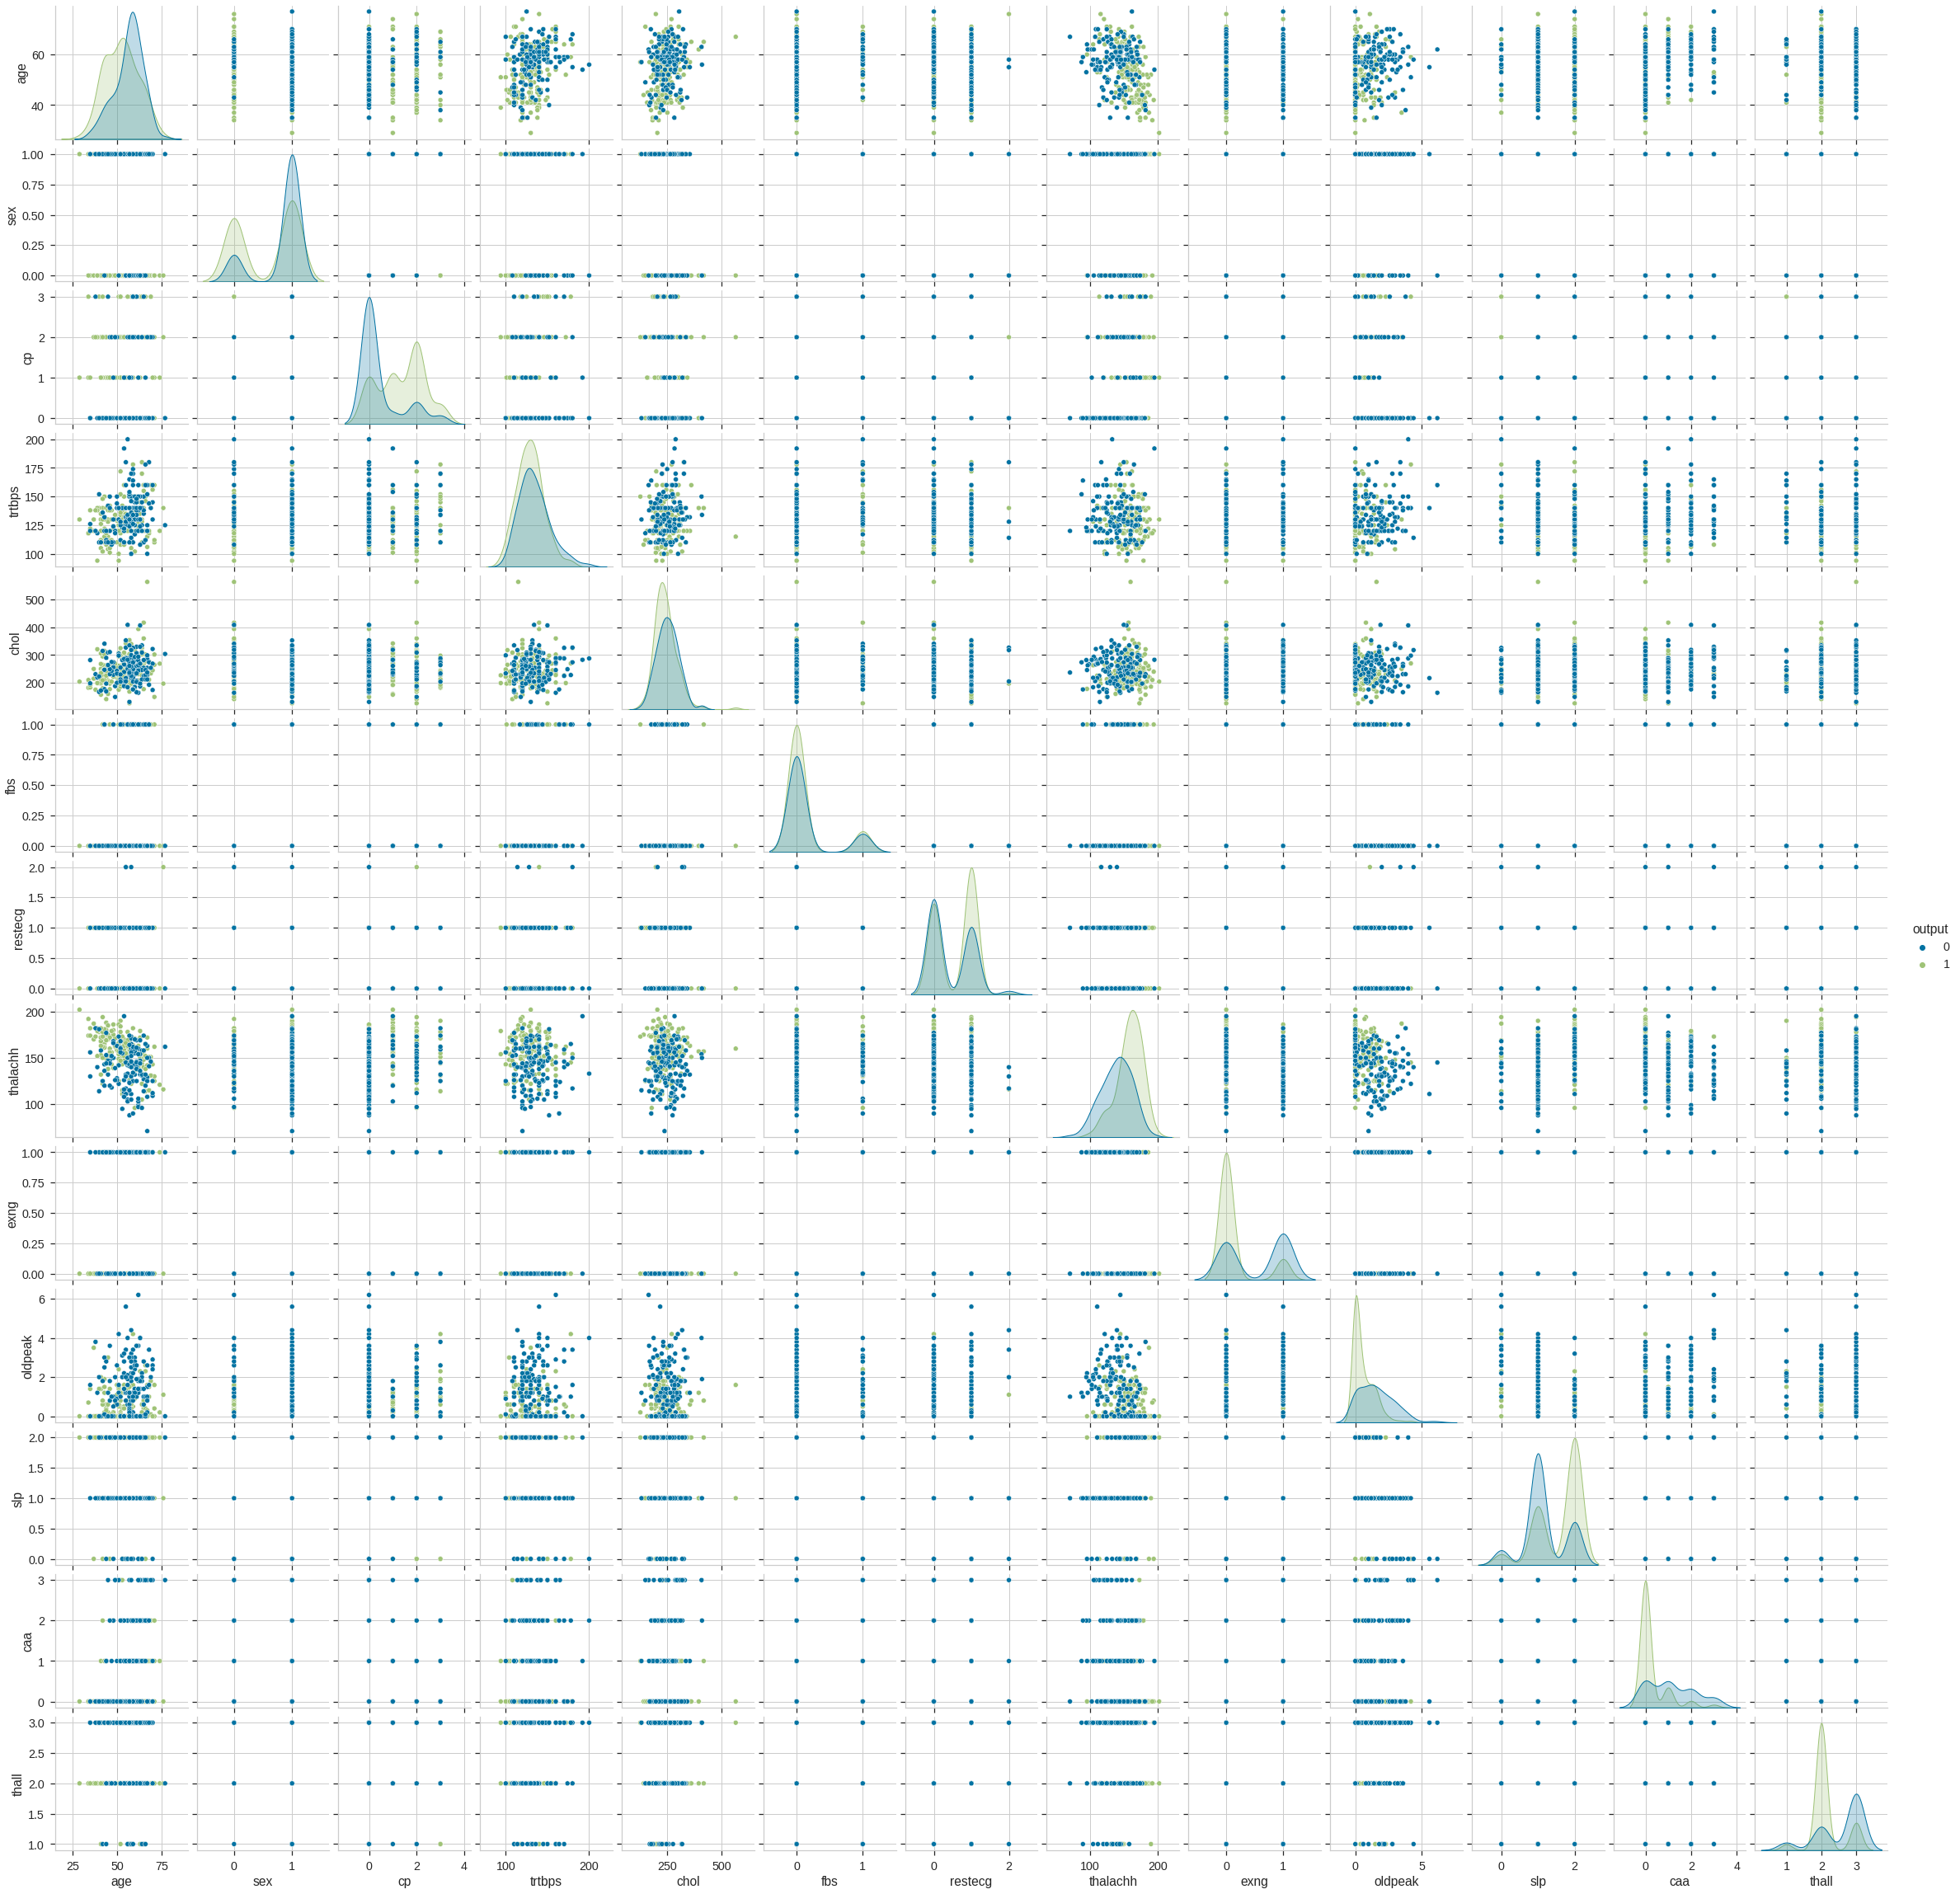

In [ ]:
sns.pairplot(df_numeric, hue="output")
plt.show()

#Interpretations:

#1. oldpeak having a linear separation relation between disease and non-disease.
#2. thalach having a mild separation relation between disease and non-disease.
#3. Other features don’t form any clear separation.

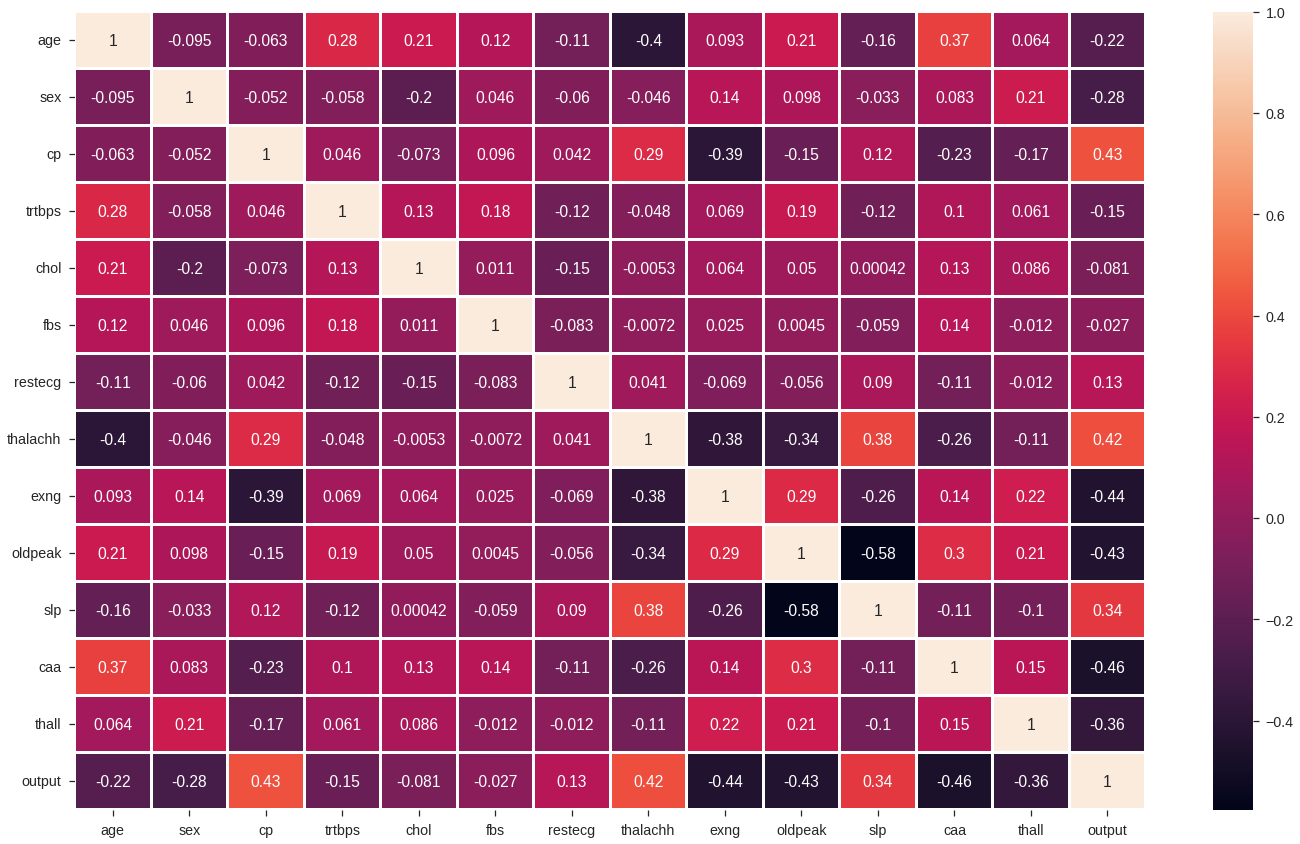

In [ ]:
#Generating Heatmap

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df_numeric.corr(),annot=True,linewidth =2)
plt.tight_layout()

#2. DATA PRE PROCESSING


##Dropping Unecessary Variables

The following features have a very high correlation with other features. These data columns are highly likely to contain identical information. Also, dimensions that depict a higher correlation can adversely impact the model’s performance.


In [ ]:
df_numeric = df_numeric.drop(columns = ['cp', 'thall', 'slp'])

In [ ]:
df_final = df_numeric.copy()

##Features Separating
We seperated the 'output' column from the independent columns.

In [ ]:
X = df_numeric.drop(['output'], axis=1)
Y = df_numeric['output']

##Data Normalisation

Since correlation is scale-sensitive, we performed column normalization.


We normalised the range of independent variables of data using min-max normalization, where the values of a numeric range of a feature of data, are reduced to a scale between 0 and 1.

In [ ]:
X = MinMaxScaler().fit_transform(X)

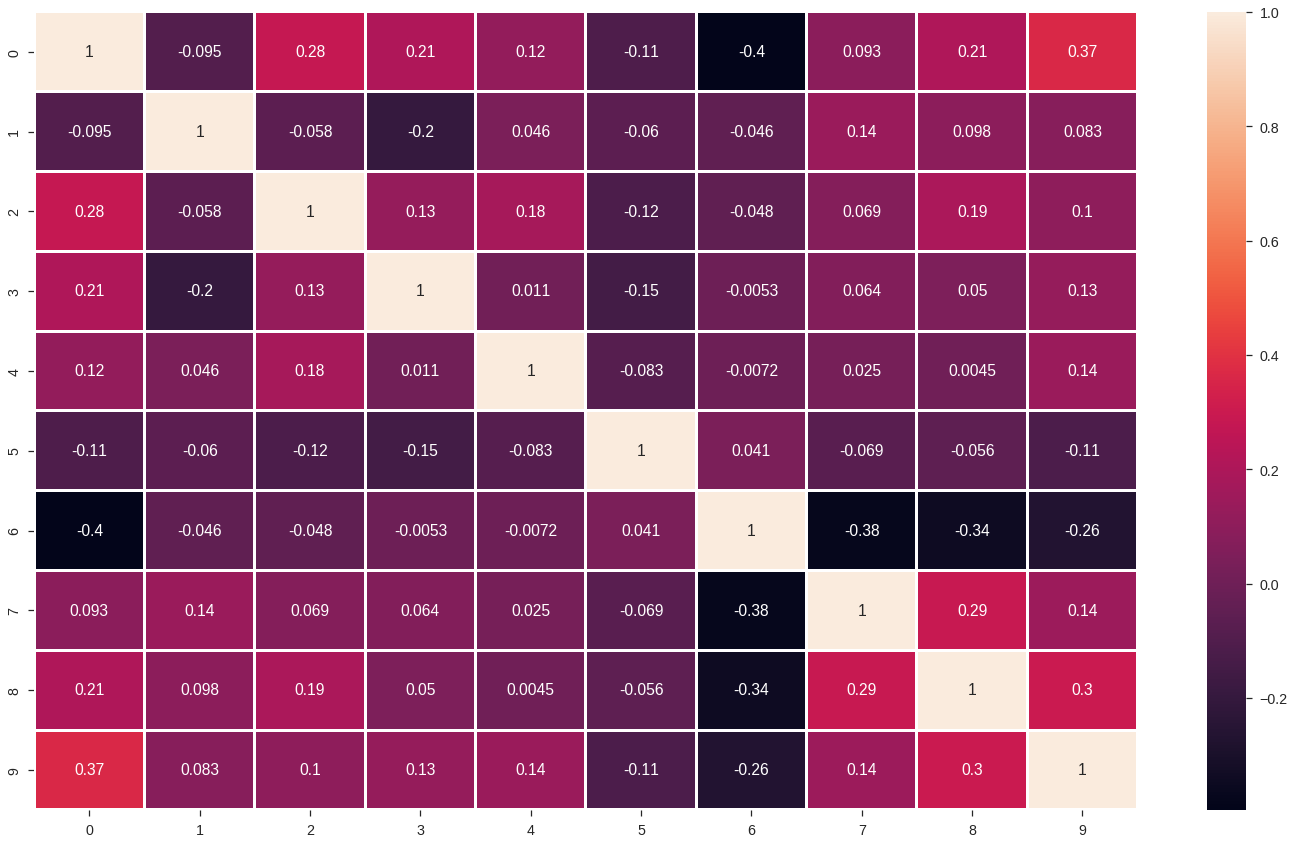

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(pd.DataFrame(X).corr(method='pearson'),annot=True,linewidth =2)
plt.tight_layout()

The figures in the normalised correlation matrix is identical to the original matrix. 

##Splitting the Dataset

We split the dataset into 80:20 ratio (80% training and 20% testing).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .2, stratify=Y, random_state=4)

#3. MODEL SELECTION


##1. LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')

In [ ]:
model1 = lr.fit(x_train,y_train) 
prediction1 = model1.predict(x_test)

.:. Logistic Regression Accuracy: 90.16% .:.

Classification Report
*************************
              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61


.: Performance Evaluation
**************************


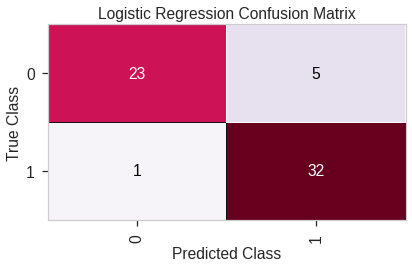

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve

LRAcc = accuracy_score(prediction1, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, prediction1))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

logmatrix = ConfusionMatrix(lr, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

plt.tight_layout();

##2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 85.25% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



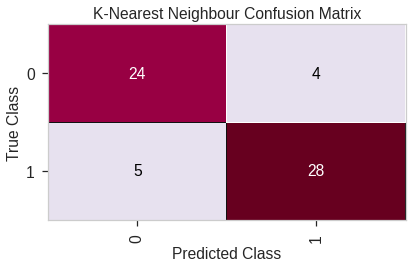

In [ ]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

plt.tight_layout();

##3.SVM

In [ ]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

.:. Support Vector Machine Accuracy: 90.16% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


.: Performance Evaluation
**************************


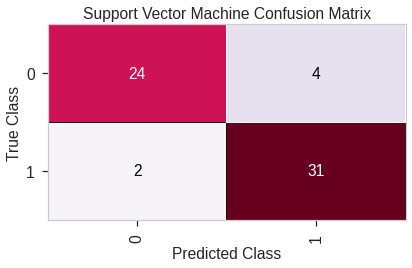

In [ ]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)


# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

plt.tight_layout();

##4. GNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

.:. Gaussian Naive Bayes Accuracy: 90.16% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


.: Performance Evaluation
**************************


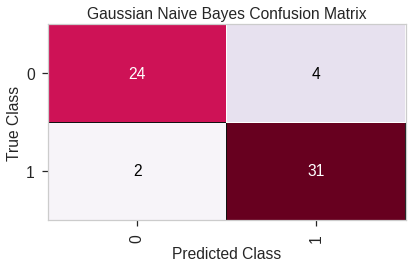

In [ ]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

plt.tight_layout();

##5. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 93.44% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.91      0.97      0.94        33

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61


.: Performance Evaluation
**************************


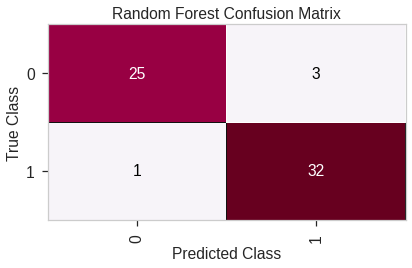

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

plt.tight_layout();

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, RFAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index()


Model,Accuracy
Random Forest,93.442623
Logistic Regression,90.163934
Support Vector Machine,90.163934
Gaussian Naive Bayes,90.163934
K-Nearest Neighbour,85.245902


#MODEL FINALISATION

It is evident from the f1 score as well as the classification accuracy that Random Forest is the best performing Machine Learning model for the Heart dataset.


##HYPERPARAMETER FINE-TUNING
####n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15

.:. Random Forest Accuracy: 93.443% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0     0.9615    0.8929    0.9259        28
           1     0.9143    0.9697    0.9412        33

    accuracy                         0.9344        61
   macro avg     0.9379    0.9313    0.9336        61
weighted avg     0.9360    0.9344    0.9342        61


.: Performance Evaluation
**************************


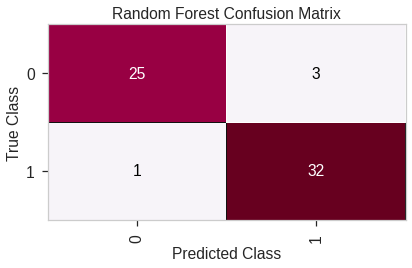

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=500, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.3f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF, digits=4))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

plt.tight_layout();

.:. Random Forest Accuracy: 95.082% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0     1.0000    0.8929    0.9434        28
           1     0.9167    1.0000    0.9565        33

    accuracy                         0.9508        61
   macro avg     0.9583    0.9464    0.9500        61
weighted avg     0.9549    0.9508    0.9505        61


.: Performance Evaluation
**************************


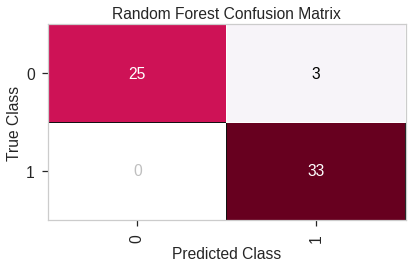

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=50, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.3f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF, digits=4))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

plt.tight_layout();

.:. Random Forest Accuracy: 95.082% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0     1.0000    0.8929    0.9434        28
           1     0.9167    1.0000    0.9565        33

    accuracy                         0.9508        61
   macro avg     0.9583    0.9464    0.9500        61
weighted avg     0.9549    0.9508    0.9505        61


.: Performance Evaluation
**************************


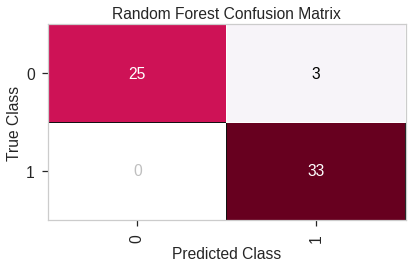

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=25, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.3f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF, digits=4))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

plt.tight_layout();

.:. Random Forest Accuracy: 95.082% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0     1.0000    0.8929    0.9434        28
           1     0.9167    1.0000    0.9565        33

    accuracy                         0.9508        61
   macro avg     0.9583    0.9464    0.9500        61
weighted avg     0.9549    0.9508    0.9505        61


.: Performance Evaluation
**************************


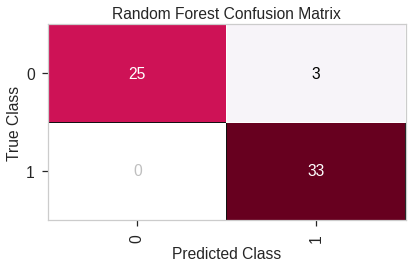

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=70, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.3f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF, digits=4))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

plt.tight_layout();

#4. MODEL RESULTS AND INTERPRETATIONS


After implementing hyperparameter fine-tuning, we infer that random forests with 50-70 estimators.





.:. Random Forest Accuracy: 95.082% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0     1.0000    0.8929    0.9434        28
           1     0.9167    1.0000    0.9565        33

    accuracy                         0.9508        61
   macro avg     0.9583    0.9464    0.9500        61
weighted avg     0.9549    0.9508    0.9505        61


.: Performance Evaluation
**************************


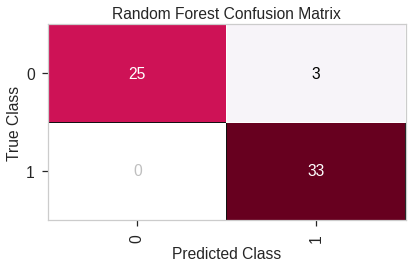

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=70, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.3f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF, digits=4))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

plt.tight_layout();

In [ ]:
df_final.drop('output', axis=1, inplace=True)

In [ ]:
imp = RFclassifier.feature_importances_
imp = pd.DataFrame(imp, index = df_final.columns,columns = ['importance'])
imp.sort_values(by = 'importance',ascending=False, inplace = True)
imp

,importance
caa,0.219146
thalachh,0.174894
oldpeak,0.174855
exng,0.103395
age,0.089196
sex,0.075778
chol,0.068849
trtbps,0.066791
restecg,0.021899
fbs,0.005197


###We have the following two inferences from the above table:
1. caa is the most important feature 
2. fbs is the least influential feature 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
RFclassifier = RandomForestClassifier(n_estimators=70, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict_proba(x_test)

###predict_proba allows us to view the probability of each class label

In [ ]:
y_pred_RF

array([[0.5539012 , 0.4460988 ],
       [0.3535154 , 0.6464846 ],
       [0.40844646, 0.59155354],
       [0.83967042, 0.16032958],
       [0.89048009, 0.10951991],
       [0.26539058, 0.73460942],
       [0.37701377, 0.62298623],
       [0.67446374, 0.32553626],
       [0.36308998, 0.63691002],
       [0.04493385, 0.95506615],
       [0.04472852, 0.95527148],
       [0.19363649, 0.80636351],
       [0.2394968 , 0.7605032 ],
       [0.40687148, 0.59312852],
       [0.63079408, 0.36920592],
       [0.70012826, 0.29987174],
       [0.62140577, 0.37859423],
       [0.31708177, 0.68291823],
       [0.9751293 , 0.0248707 ],
       [0.55334526, 0.44665474],
       [0.63738547, 0.36261453],
       [0.25535194, 0.74464806],
       [0.59787107, 0.40212893],
       [0.78139799, 0.21860201],
       [0.35667839, 0.64332161],
       [0.70202252, 0.29797748],
       [0.12099491, 0.87900509],
       [0.14086788, 0.85913212],
       [0.10542165, 0.89457835],
       [0.97738246, 0.02261754],
       [0.

#CONCLUSION

By using our best model (Random Forest), we have achieved an accuracy of 95.082%. 